In this notebook, I developed an algorithm to tile raster adf files together

In [1]:
#import packages
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

In [3]:
#set working directory
working_dir = os.chdir('/home/naheemadebisi/snow-analytics/lidar/raster/Bare_Earth_Digital_Elevation_Models')

In [5]:
#recursively search for all files in a directory
files = glob.glob('*/w001001.adf')
files

['be_gm1_0424/w001001.adf',
 'be_gm1_0182/w001001.adf',
 'be_gm1_0070/w001001.adf',
 'be_gm1_0282/w001001.adf',
 'be_gm1_0318/w001001.adf',
 'be_gm1_0527/w001001.adf',
 'be_gm1_0388/w001001.adf',
 'be_gm1_0408/w001001.adf',
 'be_gm1_0297/w001001.adf',
 'be_gm1_0379/w001001.adf',
 'be_gm1_0086/w001001.adf',
 'be_gm1_0533/w001001.adf',
 'be_gm1_0060/w001001.adf',
 'be_gm1_0490/w001001.adf',
 'be_gm1_0529/w001001.adf',
 'be_gm1_0113/w001001.adf',
 'be_gm1_0594/w001001.adf',
 'be_gm1_0367/w001001.adf',
 'be_gm1_0028/w001001.adf',
 'be_gm1_0232/w001001.adf',
 'be_gm1_0326/w001001.adf',
 'be_gm1_0229/w001001.adf',
 'be_gm1_0387/w001001.adf',
 'be_gm1_0470/w001001.adf',
 'be_gm1_0561/w001001.adf',
 'be_gm1_0617/w001001.adf',
 'be_gm1_0283/w001001.adf',
 'be_gm1_0363/w001001.adf',
 'be_gm1_0063/w001001.adf',
 'be_gm1_0391/w001001.adf',
 'be_gm1_0506/w001001.adf',
 'be_gm1_0439/w001001.adf',
 'be_gm1_0429/w001001.adf',
 'be_gm1_0093/w001001.adf',
 'be_gm1_0221/w001001.adf',
 'be_gm1_0350/w00100

In [10]:
src_files_to_mosaic = []

for fp in files:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic


[<open DatasetReader name='be_gm1_0424/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0182/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0070/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0282/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0318/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0527/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0388/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0408/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0297/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0379/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0086/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0533/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0060/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0490/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0529/w001001.adf' mode='r'>,
 <open DatasetReader name='be_gm1_0113/w001001.adf' mod

In [11]:
mosaic_raster, out_trans_raster = merge(src_files_to_mosaic)

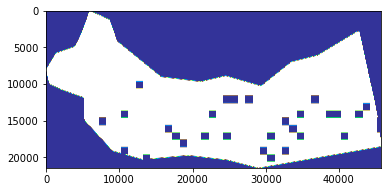

<AxesSubplot:>

In [13]:
show(mosaic_raster, cmap = 'terrain')

In [14]:
#copy the metadata
out_meta = src.meta.copy()

#update the metadata
out_meta.update({
    'driver': 'GTiff',
    'height': mosaic_raster.shape[1],
    'width': mosaic_raster.shape[2],
    'transform': out_trans_raster
})

In [17]:
out_fp = '/home/naheemadebisi/snow-analytics/lidar/raster/DEM_mosaic.tif'

In [18]:
#Write the mosaic raster to disk
with rasterio.open(out_fp, 'w', **out_meta) as dest:
    dest.write(mosaic_raster)